### Описание
Jupyter-notebook посвящен анализу производительности различных алгоритмов решения задачи достижимости между всеми парами вершин с контекстно-свободными ограничениями: алгоритма Хеллингса, матричного алгоритма, тензорного алгоритма.

### Постановка задачи
- Сравнить производительность различных алгоритмов решения задачи достижимости с контекстно-свободными ограничениями
- Сравнить различные реализации (CPU, GPU) алгоритмов решения задачи достижимости с контекстно-свободными ограничениями
- Сравнить производительность реализованных CFPQ алгоритмов со специализированными алгоритмами RPQ для задачи достижимости с регулярными ограничениями

### Описание алгоритмов
В эксперименте будут рассмотрены алгоритмы на основе разреженных матриц с использованием библиотек `scipy.sparse` и `pycubool`

### Оборудование
Эксперимент проводился на ноутбуке ASUS VivoBook K510UN-BQ502 с процессором Intel® Core™ i5-8250U CPU @ 1.60GHz × 8, видеокартой GeForce MX150 и оперативной памятью DDR4 16ГБ (апгрейд на +8ГБ)

### Программное обеспечение
- Ubuntu 18.04LTS, 64-bit
- Python3.9

In [1]:
!lscpu
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi
!grep MemTotal /proc/meminfo

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              8
On-line CPU(s) list: 0-7
Thread(s) per core:  2
Core(s) per socket:  4
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               142
Model name:          Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
Stepping:            10
CPU MHz:             900.020
CPU max MHz:         3400,0000
CPU min MHz:         400,0000
BogoMIPS:            3600.00
Virtualization:      VT-x
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            6144K
NUMA node0 CPU(s):   0-7
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf pni pclmulqdq dtes64 monitor ds_cpl vmx est tm2 ssse3 sdbg

In [2]:
!pip3.9 install -r requirements.txt

In [1]:
import numpy as np
import project.graphLib

import sources directory


In [2]:
class Graph:
  def __init__(self, name, graph, nodes_num=0, edges_num=0, labels=[]):
    self.name = name
    self.graph = graph
    self.nodes_num = nodes_num
    self.edges_num = edges_num
    self.labels = labels
    self.labels_num = len(labels)

In [3]:
rdf_names = [
             'core', 
             'enzyme', 
             'foaf', 
             'funding', 
             'generations', 
             'geospecies', 
             'go',  
             'pathways', 
             'pizza', 
             'skos', 
             'travel',  
             'wine',
             
]

с_alias_names = [
    'wc',
    'gzip',
    'pr',
    'bzip',
]

java_analys_names = [
    'lusearch',
    'sunflow',
]

In [4]:
import cfpq_data
graphs_ = {'RDF': {}, 'C': {}, 'Java':{}}
for name in rdf_names:
    try:
        graph, nodes_num, edges_num, labels = project.graphLib.get_graph_info(name)
        graphs_['RDF'][name] = Graph(name, graph, nodes_num, edges_num, (labels))
    except:
        print("Graph with name " + name + " does not exist")
        
for name in с_alias_names:
    try:
        graph, nodes_num, edges_num, labels = project.graphLib.get_graph_info(name)
        graphs_['C'][name] = Graph(name, graph, nodes_num, edges_num, (labels))
    except:
        print("Graph with name " + name + " does not exist")
        
for name in java_analys_names:
    try:
        graph, nodes_num, edges_num, labels = project.graphLib.get_graph_info(name)
        graphs_['Java'][name] = Graph(name, graph, nodes_num, edges_num, (labels))
    except:
        print("Graph with name " + name + " does not exist")

[2022-12-14 18:58:31]>INFO>Found graph with name='core'
[2022-12-14 18:58:32]>INFO>Load archive graph_archive=PosixPath('/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/cfpq_data/data/graphs/core.tar.gz')
[2022-12-14 18:58:32]>INFO>Unzip graph name='core' to file graph=PosixPath('/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/cfpq_data/data/graphs/core/core.csv')
[2022-12-14 18:58:32]>INFO>Remove archive graph_archive=PosixPath('/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/cfpq_data/data/graphs/core.tar.gz')
[2022-12-14 18:58:32]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f723427e160> from path=PosixPath('/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/cfpq_data/data/graphs/core/core.csv')
[2022-12-14 18:58:32]>INFO>Found graph with name='enzyme'
[2022-12-14 18:58:32]>INFO>Load archive graph_archive=PosixPath('/home/jexez/homeworks/formal-lang-course/env

[2022-12-14 18:59:06]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f71f4a65fa0> from path=PosixPath('/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/cfpq_data/data/graphs/skos/skos.csv')
[2022-12-14 18:59:06]>INFO>Found graph with name='travel'
[2022-12-14 18:59:06]>INFO>Load archive graph_archive=PosixPath('/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/cfpq_data/data/graphs/travel.tar.gz')
[2022-12-14 18:59:06]>INFO>Unzip graph name='travel' to file graph=PosixPath('/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/cfpq_data/data/graphs/travel/travel.csv')
[2022-12-14 18:59:06]>INFO>Remove archive graph_archive=PosixPath('/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/cfpq_data/data/graphs/travel.tar.gz')
[2022-12-14 18:59:06]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f71f4a7fd00> from path=PosixPath('/home/jexez/homeworks/form

In [5]:
import pandas as pd

### RDF Graphs

In [6]:
data = {name: [graph.nodes_num, graph.edges_num, graph.labels_num] for name, graph in graphs_['RDF'].items()}
columns = ['Nodes number', 'Edges number', 'Labels number']

graph_info = pd.DataFrame.from_dict(data, orient='index', columns=columns)
graph_info

,Nodes number,Edges number,Labels number
core,1323,2752,31
enzyme,48815,86543,14
foaf,256,631,15
funding,778,1086,20
generations,129,273,17
geospecies,450609,2201532,118
go,582929,1437437,47
pathways,6238,12363,5
pizza,671,1980,23
skos,144,252,21


###  C program Graphs

In [7]:
data = {name: [graph.nodes_num, graph.edges_num, graph.labels_num] for name, graph in graphs_['C'].items()}
columns = ['Nodes number', 'Edges number', 'Labels number']

graph_info = pd.DataFrame.from_dict(data, orient='index', columns=columns)
graph_info

,Nodes number,Edges number,Labels number
wc,332,269,2
gzip,2687,2293,2
pr,815,692,2
bzip,632,556,2


### Java program Graphs

In [8]:
data = {name: [graph.nodes_num, graph.edges_num, graph.labels_num] for name, graph in graphs_['Java'].items()}
columns = ['Nodes number', 'Edges number', 'Labels number']

graph_info = pd.DataFrame.from_dict(data, orient='index', columns=columns)
graph_info

,Nodes number,Edges number,Labels number
lusearch,15774,14994,680
sunflow,15464,15957,455


- Граф go_hierarchy не будет участвовать в экспериментах, так как содержит всего одну метку
- Графы `geospecies`, `go`, `enzyme` будем называть большими графами
- Остальные RDF-графы будем называть маленькими

In [9]:

big_graph_names = ['geospecies', 'go', 'enzyme']
small_graph_names = list(set(rdf_names) - set(big_graph_names))

big_graphs = {name: graphs_['RDF'][name] for name in big_graph_names}
small_graphs = {name: graphs_['RDF'][name] for name in small_graph_names}

### КС-запросы
В качестве КС-запросов при анализе RDF использовались грамматики из раздела "Canonical grammars". <br>

- `S -> subClassOf_r S subClassOf | subClassOf_r subClassOf` <br>
 `S -> type_r S type | type_r type`
- `S -> subClassOf_r S subClassOf | subClassOf_r subClassOf `
- `S -> type_r S type | type_r type`

В качестве КС-запросов для анализа Java программ использовались грамматики из раздела "Canonical grammars". <br>

### Регулярные запросы
К каждому графу $G$ выполнялись регулярные запросы следующего вида:

- $(l_1|l_2)^*$

- $(l_1|l_2)^*.l_1.l_2^*$

- $(l_1|l_2)^*.l_1l_2.(l_1|l_2)^*$

- $l_1l_2l_2l_1(l_2)^*$


где $l_1, l_2$ $-$ первые две метки графа $G$.

In [10]:
from pyformlang.cfg import CFG
from pyformlang.regular_expression.regex_objects import Symbol
from pyformlang.regular_expression import Regex

def create_regex1(labels):
    r1 = str(labels[0])
    r2 = str(labels[1])
    return Regex(f'({r1}|{r2})*')

def create_regex2(labels):
    r1 = str(labels[0])
    r2 = str(labels[1])
    return Regex(f'({r1}|{r2})*.{r1}.({r2}*)')


def create_regex3(labels):
    r1 = str(labels[0])
    r2 = str(labels[1])
    return Regex(f'({r1}|{r2})*.{r1}.{r2}.({r1}|{r2})*')


def create_regex4(labels):
    r1 = str(labels[0])
    r2 = str(labels[1])
    return Regex(f'{r1}.{r2}.{r2}.r1.({r2}*)')

def init_regex_qs(labels):
    return [
        create_regex1(labels),
        create_regex2(labels),
        create_regex3(labels),
        create_regex4(labels)
    ]


def create_cfg_from_regex1(labels):
    """(l1|l2)*"""
    r1 = str(labels[0])
    r2 = str(labels[1])
    return (f'S -> {r1} S \n S -> {r2} S \n S -> epsilon \n')

def create_cfg_from_regex2(labels):
    """(𝑙1|𝑙2)∗.𝑙1.𝑙2*"""
    r1 = str(labels[0]) 
    r2 = str(labels[1])
    return (f'S -> A B C\n A -> {r1} A \n A -> {r2} A \n A -> epsilon \n B -> {r1} \n C -> {r2} C \n C -> epsilon')

def create_cfg_from_regex3(labels):
    """(𝑙1|𝑙2)∗.𝑙1𝑙2.(𝑙1|𝑙2)∗"""
    r1 = str(labels[0])
    r2 = str(labels[1])
    return (f'S -> A B A\n A -> {r1} A \n A -> {r2} A \n A -> epsilon \n B -> {r1} {r2}')

def create_cfg_from_regex4(labels):
    """𝑙1𝑙2𝑙2𝑙1(𝑙2)∗"""
    r1 = str(labels[0])
    r2 = str(labels[1])
    return (f'S -> A B \n A -> {r1} {r2} {r1} {r2} \n B -> {r2} B \n B -> epsilon')


def init_queries(graph, labels):
    return [
        create_cfg_from_regex1(labels),
        create_cfg_from_regex2(labels),
        create_cfg_from_regex3(labels),
        create_cfg_from_regex4(labels)
    ]

def init_rdf_cfgs(graph):
    return [
        "S -> subClassOf_r S subClassOf | subClassOf_r subClassOf \n S -> type_r S type | type_r type",
        "S -> subClassOf_r S subClassOf | subClassOf_r subClassOf",
        "S -> type_r S type | type_r type",
    ]

def init_C_cfgs(graph):
    return [
        """
        S -> d_r V d
        V -> V1 V2 V3
        V1 -> epsilon
        V1 -> V2 a_r V1
        V2 -> epsilon
        V2 -> S
        V3 -> epsilon
        V3 -> a V2 V3
        """
    ]

def init_Java_cfgs(graph):
    return [
        """
        S -> PTh alloc
        PTh -> epsilon
        PTh -> assign PTh
        PTh -> load_0 Al store_0 PTh
        PTh -> load_1 Al store_1 PTh
        FT -> alloc_r FTh
        FTh -> epsilon
        FTh -> assign_r FTh
        FTh -> store_0_r Al load_0_r FTh
        FTh -> store_1_r Al load_1_r FTh
        Al -> S FT
        """
    ]

def create_cfgs(graph, labels):
    q_regex = init_queries(graph, labels)
    
    cfgs = []
    q_cfg = []
    
    for q in q_regex:
        cfgs.append(CFG.from_text(q))
        
    if graph.name in rdf_names:
        q_cfg = init_rdf_cfgs(graph)
    elif graph.name in с_alias_names:
        q_cfg = init_C_cfgs(graph)
    elif graph.name in java_analys_names:
        q_cfg = init_Java_cfgs(graph)
        
    for q in q_cfg:
            cfgs.append(CFG.from_text(q))
    return cfgs

In [11]:
regex_queries = {name: init_queries(graph, graph.labels) for name, graph in graphs_['C'].items()}
regex_queries_columns = ['regex1', 'regex2', 'regex3', 'regex4']

regex_queries_info = pd.DataFrame.from_dict(regex_queries, orient='index', columns=regex_queries_columns)
regex_queries_info

,regex1,regex2,regex3,regex4
wc,S -> a S \n S -> d S \n S -> epsilon \n,S -> A B C\n A -> a A \n A -> d A \n A -> epsi...,S -> A B A\n A -> a A \n A -> d A \n A -> epsi...,S -> A B \n A -> a d a d \n B -> d B \n B -> e...
gzip,S -> d S \n S -> a S \n S -> epsilon \n,S -> A B C\n A -> d A \n A -> a A \n A -> epsi...,S -> A B A\n A -> d A \n A -> a A \n A -> epsi...,S -> A B \n A -> d a d a \n B -> a B \n B -> e...
pr,S -> d S \n S -> a S \n S -> epsilon \n,S -> A B C\n A -> d A \n A -> a A \n A -> epsi...,S -> A B A\n A -> d A \n A -> a A \n A -> epsi...,S -> A B \n A -> d a d a \n B -> a B \n B -> e...
bzip,S -> d S \n S -> a S \n S -> epsilon \n,S -> A B C\n A -> d A \n A -> a A \n A -> epsi...,S -> A B A\n A -> d A \n A -> a A \n A -> epsi...,S -> A B \n A -> d a d a \n B -> a B \n B -> e...


In [14]:
%mkdir benchmark/cfpq_scipy_hellings
%mkdir benchmark/cfpq_scipy_matrix
%mkdir benchmark/cfpq_scipy_tensor
%mkdir benchmark/cfpq_pycubool_matrix
%mkdir benchmark/cfpq_pycubool_tensor

In [12]:
import csv
import time
import project.cfpq as cpu_cfpq
import project.pycubool.cfpq as gpu_cfpq

In [13]:
import signal, time

class TimeOutException(Exception):
    def __init__(self, message):
        super().__init__(message)

def signal_handler(signum, frame):
    raise TimeOutException("Timeout!") 

signal.signal(signal.SIGALRM, signal_handler)


def measure_cfpq_time(graph, queries, cfpq_algo, num_runs, timeout=0, is_gpu=True):
    rows = []
    for run_id in range(num_runs):
        print(f"{cfpq_algo}: run_id = {run_id}, graph = {graph.name}")
        isFinish = False
        for i, query in enumerate(queries):
            start_time = end_time = None
            if timeout > 0:
                signal.alarm(timeout)
            try:
                start_time = time.time()
                if cfpq_algo == 'matrix':
                    if is_gpu:
                        gpu_cfpq.cfpq_matrix(graph.graph, query)
                    else:
                        cpu_cfpq.cfpq_matrix(graph.graph, query)
                elif cfpq_algo == 'hellings':
                    if is_gpu:
                        print("WARNING! Hellings does not support GPU version")
                    cpu_cfpq.cfpq_hellings(graph.graph, query)
                else:
                    if is_gpu:
                        gpu_cfpq.cfpq_tensor(graph.graph, query)
                    else:
                        cpu_cfpq.cfpq_tensor(graph.graph, query)
                end_time = time.time()
                isFinish = True
            except TimeOutException:
                print("TIME OUT!!!")
                end_time = time.time()
                isFinish = False
            rows.append({
                'Time(s)': end_time - start_time,
                'isFinish': isFinish,
                'Query': i
            })
    return rows

In [14]:
def write_measurements(path, rows):
    fieldnames = ['Query', 'isFinish', 'Time(s)']
    with open(path, 'w', encoding='UTF8', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

def measure_algo_performance(graphs, num_runs, cfpq_algos, timeout=0, is_gpu=True):
    for cfpq_name in cfpq_algos:
      print(f'Measuring performance of {cfpq_name} algorithm with CUDA: {is_gpu}')
      for graph_name, graph in graphs.items():
        labels = list(graph.labels)
        measurements = measure_cfpq_time(
            graph, 
            create_cfgs(graph, labels),
            cfpq_name,
            num_runs=num_runs,
            timeout=timeout,
            is_gpu=is_gpu)
        if is_gpu:
            #print(f'benchmark/cfpq_pycubool_{cfpq_name}/{graph_name}.csv')
            write_measurements(f'benchmark/cfpq_pycubool_{cfpq_name}/{graph_name}.csv', measurements)
        else:
            write_measurements(f'benchmark/cfpq_scipy_{cfpq_name}/{graph_name}.csv', measurements)

### Производительность на маленьких графах (RDF)

In [18]:
measure_algo_performance(small_graphs, num_runs=10, cfpq_algos=['matrix', 'tensor'], timeout=0, is_gpu=True)

Measuring performance of matrix algorithm with CUDA: True
matrix: run_id = 0, graph = pathways
matrix: run_id = 1, graph = pathways
matrix: run_id = 2, graph = pathways
matrix: run_id = 3, graph = pathways
matrix: run_id = 4, graph = pathways
matrix: run_id = 5, graph = pathways
matrix: run_id = 6, graph = pathways
matrix: run_id = 7, graph = pathways
matrix: run_id = 8, graph = pathways
matrix: run_id = 9, graph = pathways
matrix: run_id = 0, graph = foaf
matrix: run_id = 1, graph = foaf
matrix: run_id = 2, graph = foaf
matrix: run_id = 3, graph = foaf
matrix: run_id = 4, graph = foaf
matrix: run_id = 5, graph = foaf
matrix: run_id = 6, graph = foaf
matrix: run_id = 7, graph = foaf
matrix: run_id = 8, graph = foaf
matrix: run_id = 9, graph = foaf
matrix: run_id = 0, graph = core
matrix: run_id = 1, graph = core
matrix: run_id = 2, graph = core
matrix: run_id = 3, graph = core
matrix: run_id = 4, graph = core
matrix: run_id = 5, graph = core
matrix: run_id = 6, graph = core
matrix: run

In [19]:
measure_algo_performance(small_graphs, num_runs=10, cfpq_algos=['matrix', 'tensor', 'hellings'], timeout=0, is_gpu=False)

Measuring performance of matrix algorithm with CUDA: False
matrix: run_id = 0, graph = pathways
matrix: run_id = 1, graph = pathways
matrix: run_id = 2, graph = pathways
matrix: run_id = 3, graph = pathways
matrix: run_id = 4, graph = pathways
matrix: run_id = 5, graph = pathways
matrix: run_id = 6, graph = pathways
matrix: run_id = 7, graph = pathways
matrix: run_id = 8, graph = pathways
matrix: run_id = 9, graph = pathways
matrix: run_id = 0, graph = foaf
matrix: run_id = 1, graph = foaf
matrix: run_id = 2, graph = foaf
matrix: run_id = 3, graph = foaf
matrix: run_id = 4, graph = foaf
matrix: run_id = 5, graph = foaf
matrix: run_id = 6, graph = foaf
matrix: run_id = 7, graph = foaf
matrix: run_id = 8, graph = foaf
matrix: run_id = 9, graph = foaf
matrix: run_id = 0, graph = core
matrix: run_id = 1, graph = core
matrix: run_id = 2, graph = core
matrix: run_id = 3, graph = core
matrix: run_id = 4, graph = core
matrix: run_id = 5, graph = core
matrix: run_id = 6, graph = core
matrix: ru

/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


tensor: run_id = 1, graph = pathways
tensor: run_id = 2, graph = pathways
tensor: run_id = 3, graph = pathways
tensor: run_id = 4, graph = pathways
tensor: run_id = 5, graph = pathways
tensor: run_id = 6, graph = pathways
tensor: run_id = 7, graph = pathways
tensor: run_id = 8, graph = pathways
tensor: run_id = 9, graph = pathways
tensor: run_id = 0, graph = foaf
tensor: run_id = 1, graph = foaf
tensor: run_id = 2, graph = foaf
tensor: run_id = 3, graph = foaf
tensor: run_id = 4, graph = foaf
tensor: run_id = 5, graph = foaf
tensor: run_id = 6, graph = foaf
tensor: run_id = 7, graph = foaf
tensor: run_id = 8, graph = foaf
tensor: run_id = 9, graph = foaf
tensor: run_id = 0, graph = core
tensor: run_id = 1, graph = core
tensor: run_id = 2, graph = core
tensor: run_id = 3, graph = core
tensor: run_id = 4, graph = core
tensor: run_id = 5, graph = core
tensor: run_id = 6, graph = core
tensor: run_id = 7, graph = core
tensor: run_id = 8, graph = core
tensor: run_id = 9, graph = core
tensor:

### Производительность на графах C

In [20]:
c_graphs = {name: graphs_['C'][name] for name in с_alias_names}

In [21]:
measure_algo_performance(c_graphs, num_runs=10, cfpq_algos=['matrix', 'tensor'], timeout=0, is_gpu=True)
measure_algo_performance(c_graphs, num_runs=10, cfpq_algos=['matrix', 'tensor', 'hellings'], timeout=0, is_gpu=False)

Measuring performance of matrix algorithm with CUDA: True
matrix: run_id = 0, graph = wc
matrix: run_id = 1, graph = wc
matrix: run_id = 2, graph = wc
matrix: run_id = 3, graph = wc
matrix: run_id = 4, graph = wc
matrix: run_id = 5, graph = wc
matrix: run_id = 6, graph = wc
matrix: run_id = 7, graph = wc
matrix: run_id = 8, graph = wc
matrix: run_id = 9, graph = wc
matrix: run_id = 0, graph = gzip
matrix: run_id = 1, graph = gzip
matrix: run_id = 2, graph = gzip
matrix: run_id = 3, graph = gzip
matrix: run_id = 4, graph = gzip
matrix: run_id = 5, graph = gzip
matrix: run_id = 6, graph = gzip
matrix: run_id = 7, graph = gzip
matrix: run_id = 8, graph = gzip
matrix: run_id = 9, graph = gzip
matrix: run_id = 0, graph = pr
matrix: run_id = 1, graph = pr
matrix: run_id = 2, graph = pr
matrix: run_id = 3, graph = pr
matrix: run_id = 4, graph = pr
matrix: run_id = 5, graph = pr
matrix: run_id = 6, graph = pr
matrix: run_id = 7, graph = pr
matrix: run_id = 8, graph = pr
matrix: run_id = 9, gra

### Производительность на графах Java

In [22]:
java_graphs = {name: graphs_['Java'][name] for name in java_analys_names}

In [23]:
measure_algo_performance(java_graphs, num_runs=10, cfpq_algos=['matrix', 'tensor'], timeout=0, is_gpu=True)
# measure_algo_performance(java_graphs, num_runs=10, cfpq_algos=['matrix', 'tensor', 'hellings'], timeout=0, is_gpu=False)

Measuring performance of matrix algorithm with CUDA: True
matrix: run_id = 0, graph = lusearch
matrix: run_id = 1, graph = lusearch
matrix: run_id = 2, graph = lusearch
matrix: run_id = 3, graph = lusearch
matrix: run_id = 4, graph = lusearch
matrix: run_id = 5, graph = lusearch
matrix: run_id = 6, graph = lusearch
matrix: run_id = 7, graph = lusearch
matrix: run_id = 8, graph = lusearch
matrix: run_id = 9, graph = lusearch
matrix: run_id = 0, graph = sunflow
matrix: run_id = 1, graph = sunflow
matrix: run_id = 2, graph = sunflow
matrix: run_id = 3, graph = sunflow
matrix: run_id = 4, graph = sunflow
matrix: run_id = 5, graph = sunflow
matrix: run_id = 6, graph = sunflow
matrix: run_id = 7, graph = sunflow
matrix: run_id = 8, graph = sunflow
matrix: run_id = 9, graph = sunflow
Measuring performance of tensor algorithm with CUDA: True
tensor: run_id = 0, graph = lusearch
tensor: run_id = 1, graph = lusearch
tensor: run_id = 2, graph = lusearch
tensor: run_id = 3, graph = lusearch
tensor

KeyboardInterrupt: 

In [ ]:
measure_algo_performance(java_graphs, num_runs=3, cfpq_algos=['hellings'], timeout=300, is_gpu=False)

Measuring performance of hellings algorithm with CUDA: False
hellings: run_id = 0, graph = lusearch
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
hellings: run_id = 1, graph = lusearch
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
hellings: run_id = 2, graph = lusearch
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
hellings: run_id = 0, graph = sunflow
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
hellings: run_id = 1, graph = sunflow
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
TIME OUT!!!
hellings: run_id = 2, graph = sunflow


### Алгоритм Хеллингса не завершается за 300 секунд при анализе Java-графов

In [15]:
def create_df(graph_names, types, cfpq_algos):
    # types = ['pycubool', 'scipy', 'rpq']
    dfs = []
    for t in types:
        for cfpq_name in cfpq_algos:
            if t == 'rpq' and cfpq_name == 'matrix':
                continue
            for graph_name in graph_names:
                df = pd.read_csv(f'benchmark/cfpq_{t}_{cfpq_name}/{graph_name}.csv')
                df.insert(0, 'Algorithm', t + '_' + cfpq_name)
                df.insert(0, 'Graph', graph_name)
                dfs.append(df)

    return pd.concat(dfs, ignore_index=True)

In [16]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [17]:

import seaborn as sns

def show_plots(df, graph_names, title, figsize=(18, 60)):
    fig, axes = plt.subplots(len(graph_names), 2, figsize=figsize)
    fig.subplots_adjust(left=0.05, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
    fig.suptitle(title, fontsize=25)
    
    i = 0
    for name in graph_names:
        g = sns.boxplot(ax=axes[i // 2, i % 2], x="Query", y="Time(s)", hue='Algorithm', data=df[df['Graph'] == name])
        g.set_title(name)
        g.set_yscale('log')
        i += 1
        g = sns.barplot(ax=axes[i // 2, i % 2], x="Query", y="Time(s)", hue='Algorithm', data=df[df['Graph'] == name])
        g.set_title(name)
        g.set_yscale('log')
        i += 1

    plt.show()

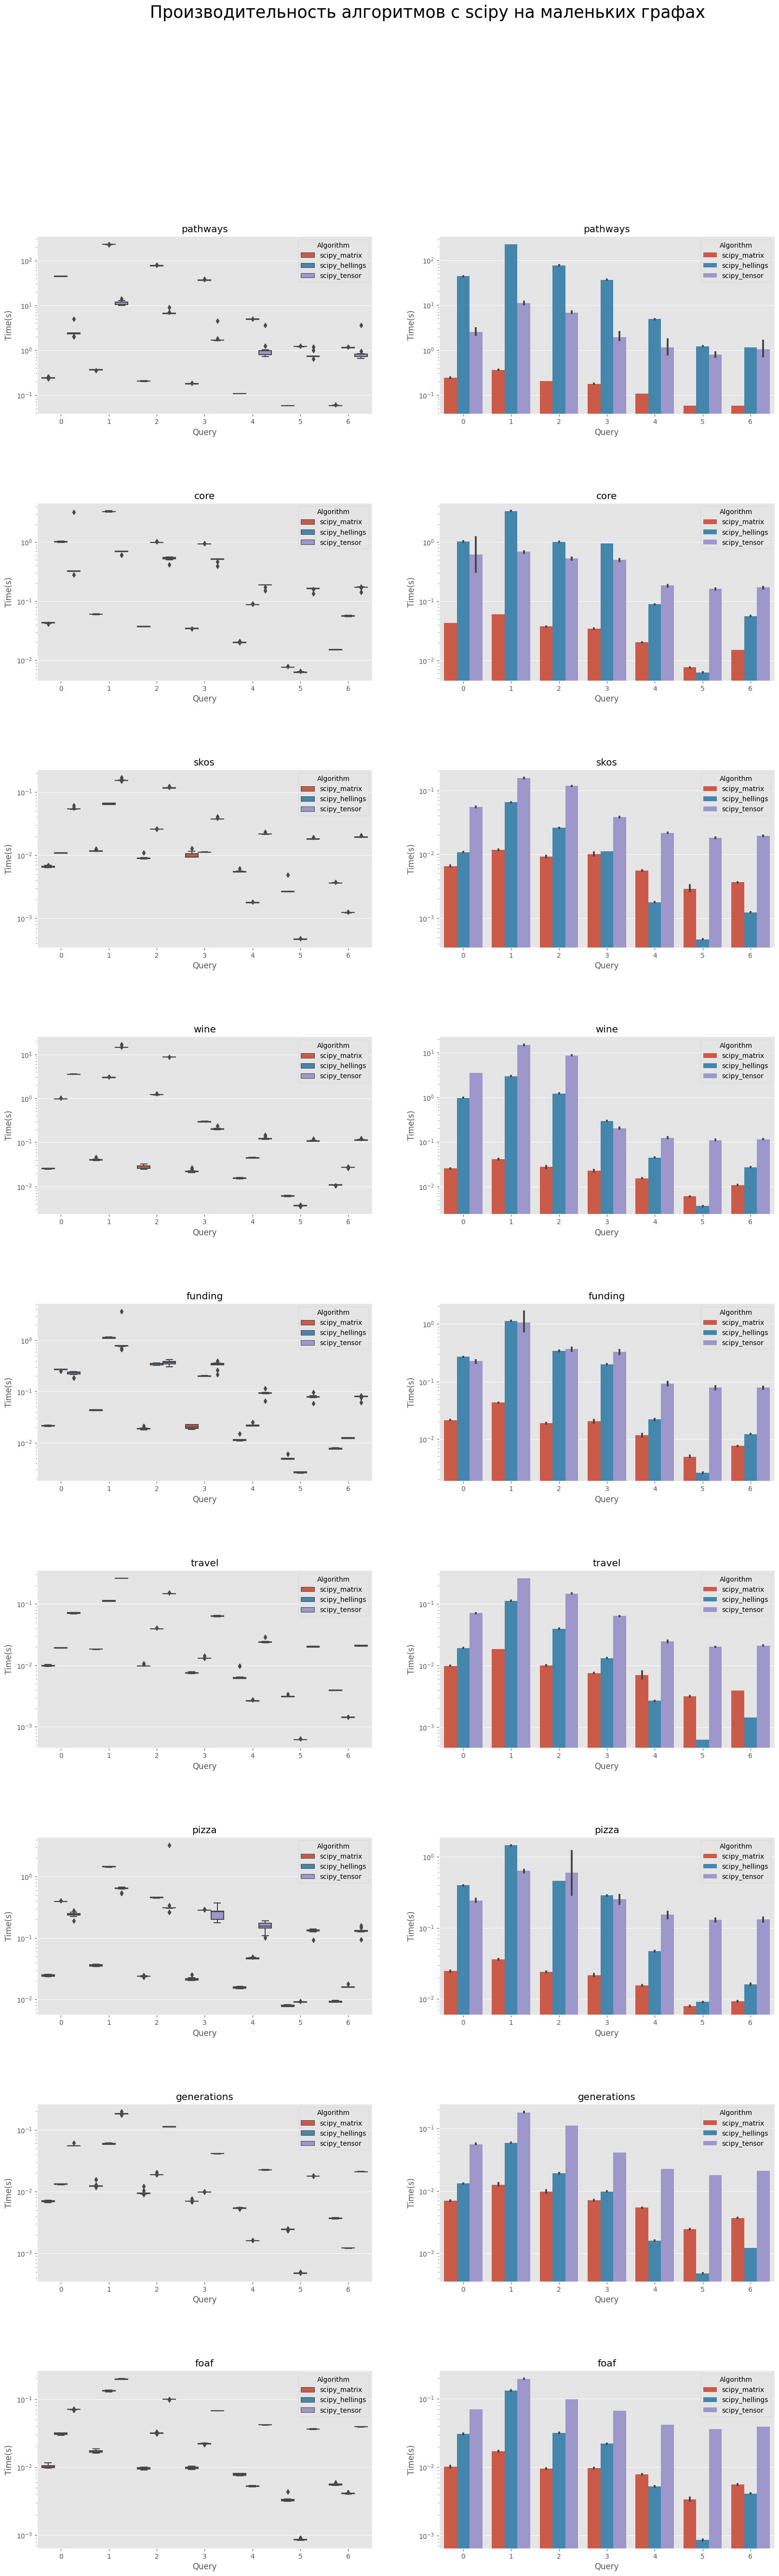

In [26]:
df_sm_scipy = create_df(small_graph_names, ['scipy'], ['matrix', 'hellings', 'tensor'])
show_plots(df_sm_scipy, small_graph_names, 'Производительность алгоритмов с scipy на маленьких графах')

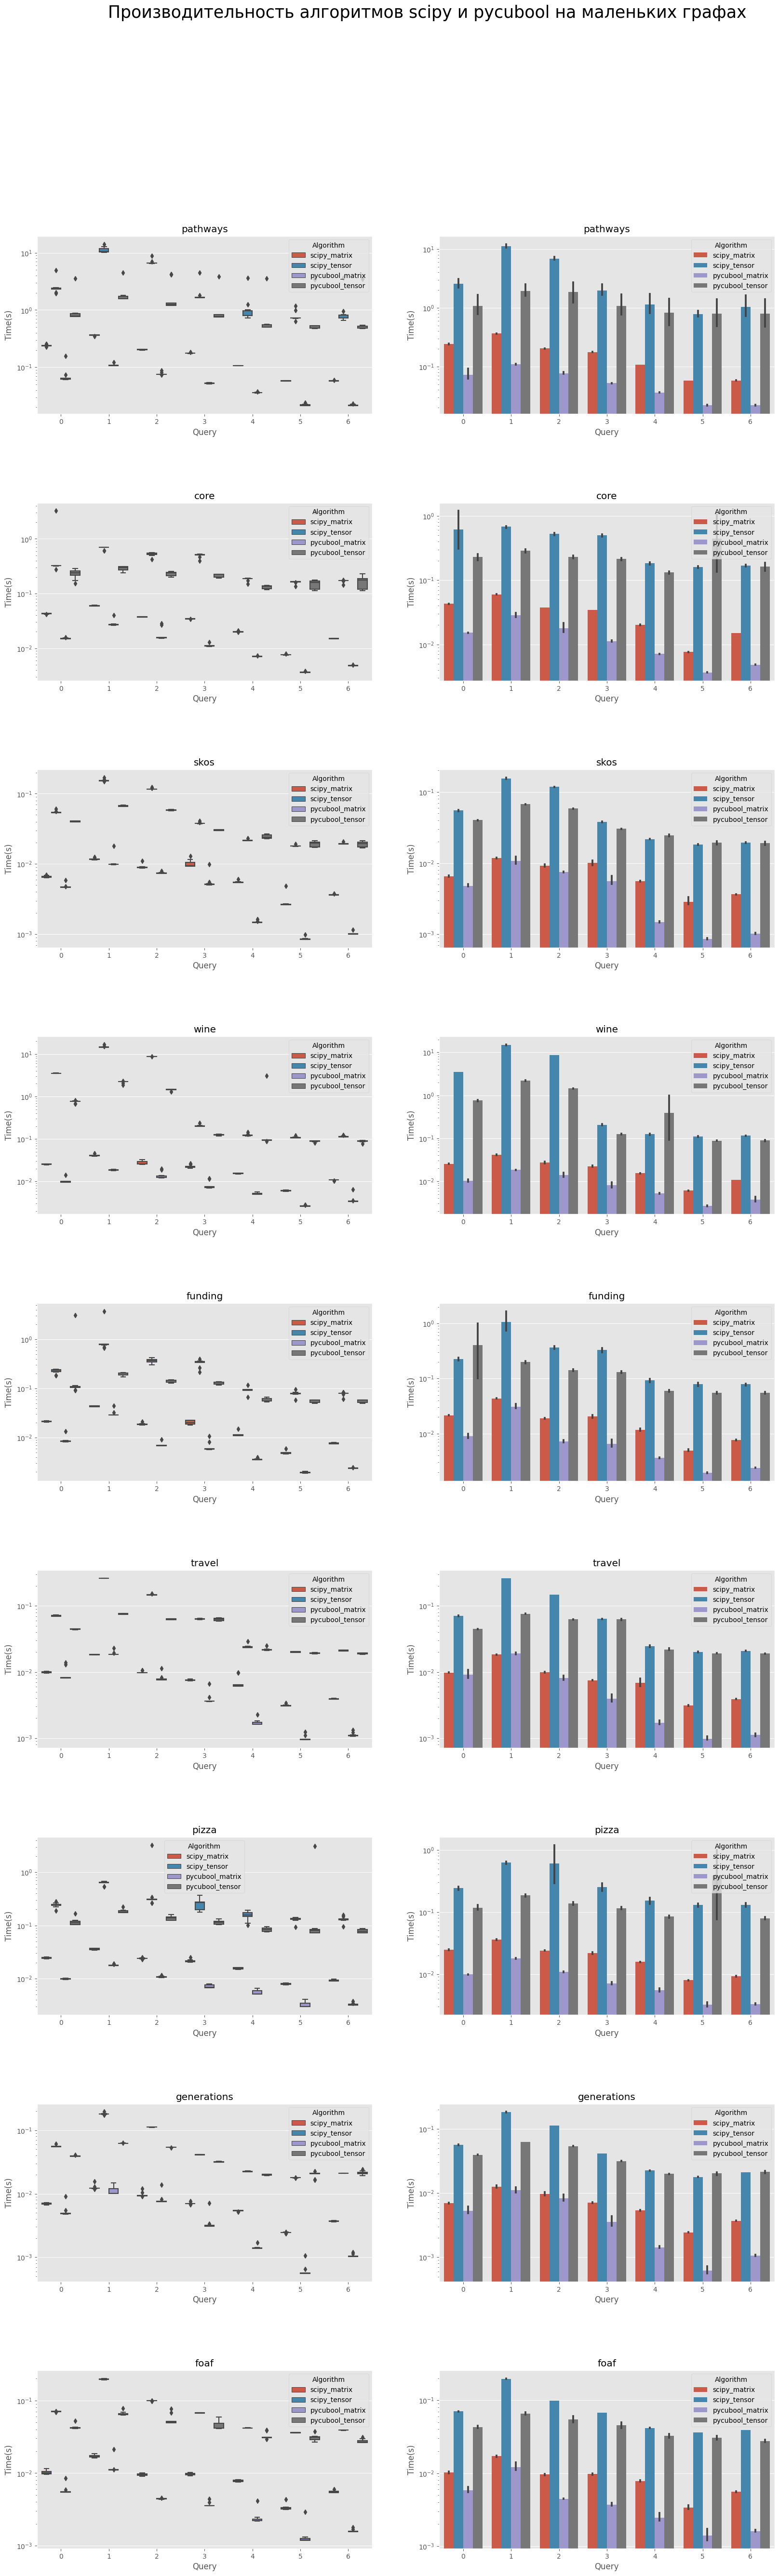

In [27]:
df_cuda_vs_scipy = create_df(small_graph_names, ['scipy', 'pycubool'], ['matrix', 'tensor'])
show_plots(df_cuda_vs_scipy, small_graph_names, 'Производительность алгоритмов scipy и pycubool на маленьких графах')

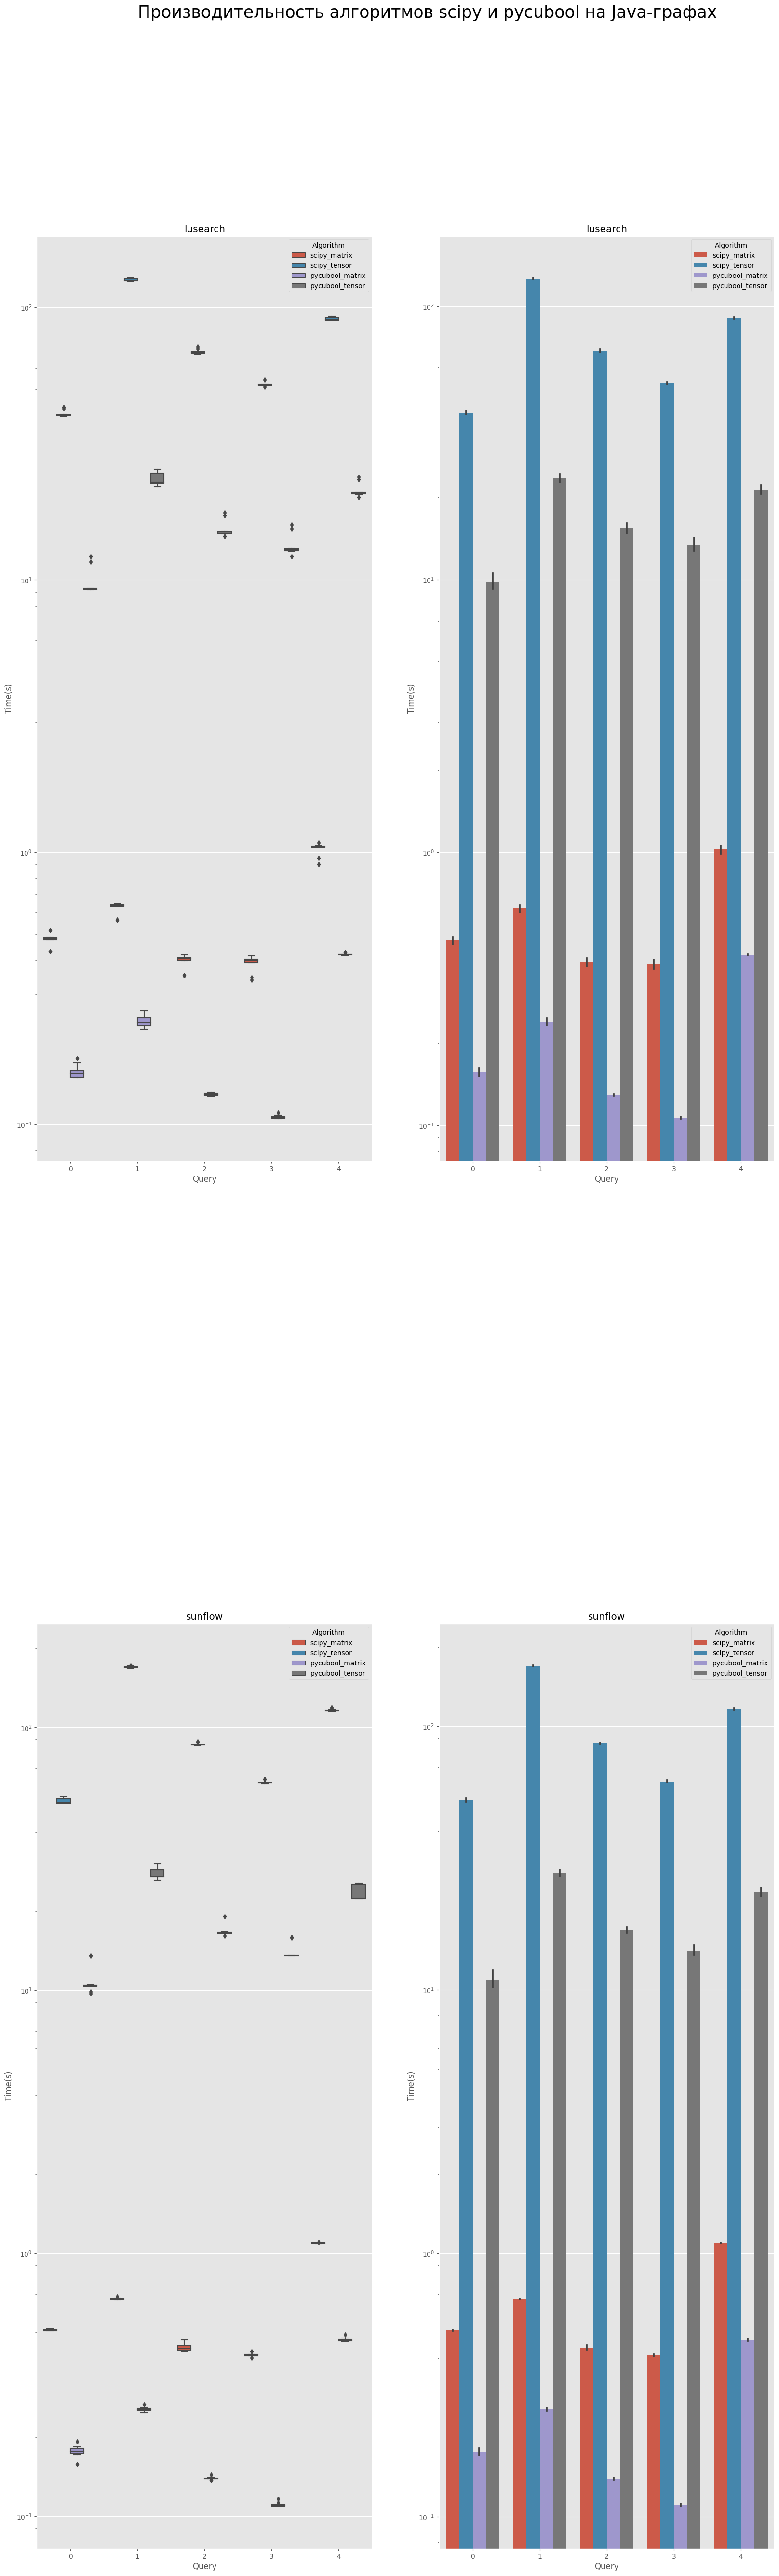

In [28]:
df_cuda_vs_scipy_java = create_df(java_analys_names, ['scipy', 'pycubool'], ['matrix', 'tensor'])
show_plots(df_cuda_vs_scipy_java, java_analys_names, 'Производительность алгоритмов scipy и pycubool на Java-графах')

### Алгоритм Hellings далее не будет участвовать в замерах, так как показывает низкую производительность на Java-графах

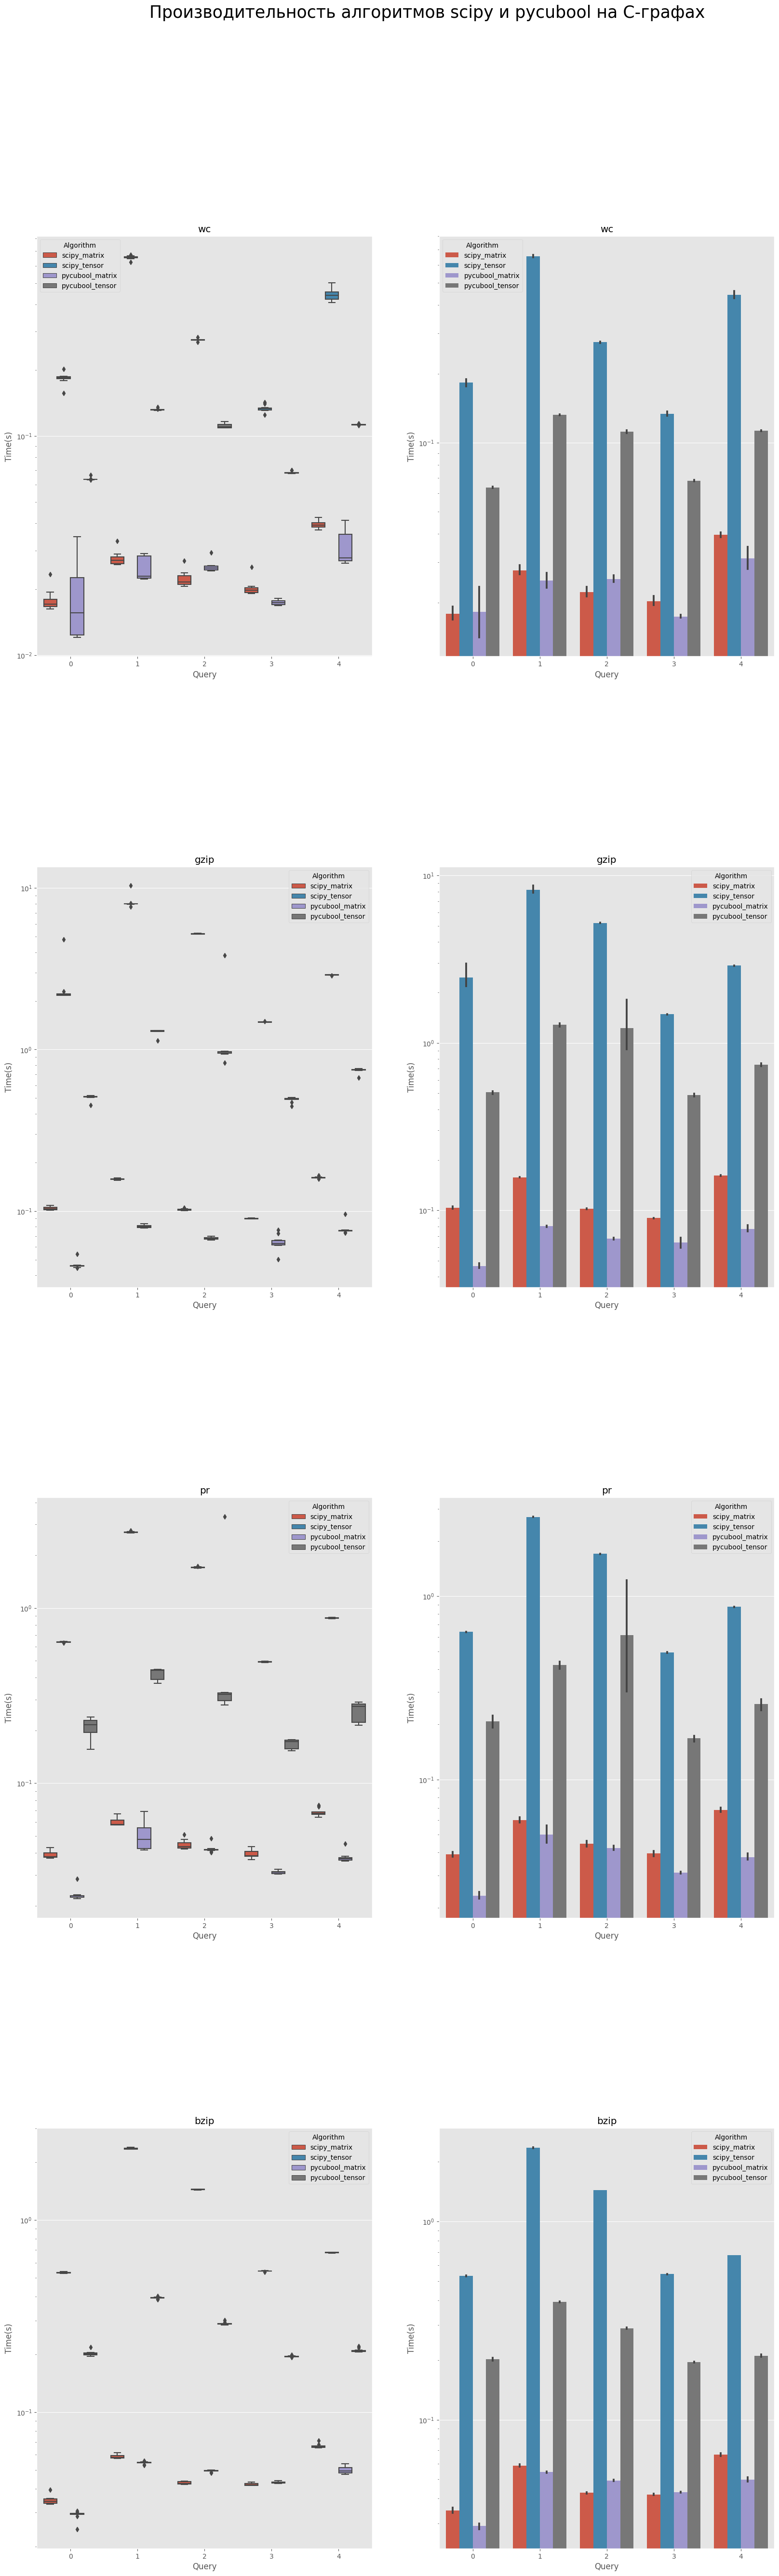

In [29]:
df_cuda_vs_scipy_C = create_df(с_alias_names, ['scipy', 'pycubool'], ['matrix', 'tensor'])
show_plots(df_cuda_vs_scipy_C, с_alias_names, 'Производительность алгоритмов scipy и pycubool на C-графах')

### По замерам на маленьких графах наиболее производительными алгоритмами являются матричные алгоритмы CPU и GPU реализаций

### Производительность на больших графах
Сначала выполним по 3 одинаковых запуска, для анализа того, какие алгоритмы на больших данных имеет смысл рассматривать

In [ ]:
#measure_algo_performance(big_graphs, num_runs=1, cfpq_algos=['tensor'], timeout=1, is_gpu=True)

In [39]:
measure_algo_performance(big_graphs, num_runs=3, cfpq_algos=['matrix'], timeout=900, is_gpu=True)

Measuring performance of matrix algorithm with CUDA: True
matrix: run_id = 0, graph = geospecies
matrix: run_id = 1, graph = geospecies
matrix: run_id = 2, graph = geospecies
matrix: run_id = 0, graph = go
matrix: run_id = 1, graph = go
matrix: run_id = 2, graph = go
matrix: run_id = 0, graph = enzyme
matrix: run_id = 1, graph = enzyme
matrix: run_id = 2, graph = enzyme


In [40]:
measure_algo_performance(big_graphs, num_runs=3, cfpq_algos=['tensor'], timeout=900, is_gpu=True)

Measuring performance of tensor algorithm with CUDA: True
tensor: run_id = 0, graph = geospecies
tensor: run_id = 1, graph = geospecies
tensor: run_id = 2, graph = geospecies
tensor: run_id = 0, graph = go
tensor: run_id = 1, graph = go
tensor: run_id = 2, graph = go
tensor: run_id = 0, graph = enzyme
tensor: run_id = 1, graph = enzyme
tensor: run_id = 2, graph = enzyme


In [41]:
measure_algo_performance(big_graphs, num_runs=3, cfpq_algos=['matrix'], timeout=900, is_gpu=False)

Measuring performance of matrix algorithm with CUDA: False
matrix: run_id = 0, graph = geospecies
matrix: run_id = 1, graph = geospecies
matrix: run_id = 2, graph = geospecies
matrix: run_id = 0, graph = go
matrix: run_id = 1, graph = go
matrix: run_id = 2, graph = go
matrix: run_id = 0, graph = enzyme
matrix: run_id = 1, graph = enzyme
matrix: run_id = 2, graph = enzyme


In [23]:
measure_algo_performance(big_graphs, num_runs=3, cfpq_algos=['tensor'], timeout=900, is_gpu=False)

Measuring performance of tensor algorithm with CUDA: False
tensor: run_id = 0, graph = geospecies


/home/jexez/homeworks/formal-lang-course/env/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


tensor: run_id = 1, graph = geospecies
tensor: run_id = 2, graph = geospecies
tensor: run_id = 0, graph = go
tensor: run_id = 1, graph = go
tensor: run_id = 2, graph = go
tensor: run_id = 0, graph = enzyme
tensor: run_id = 1, graph = enzyme
tensor: run_id = 2, graph = enzyme


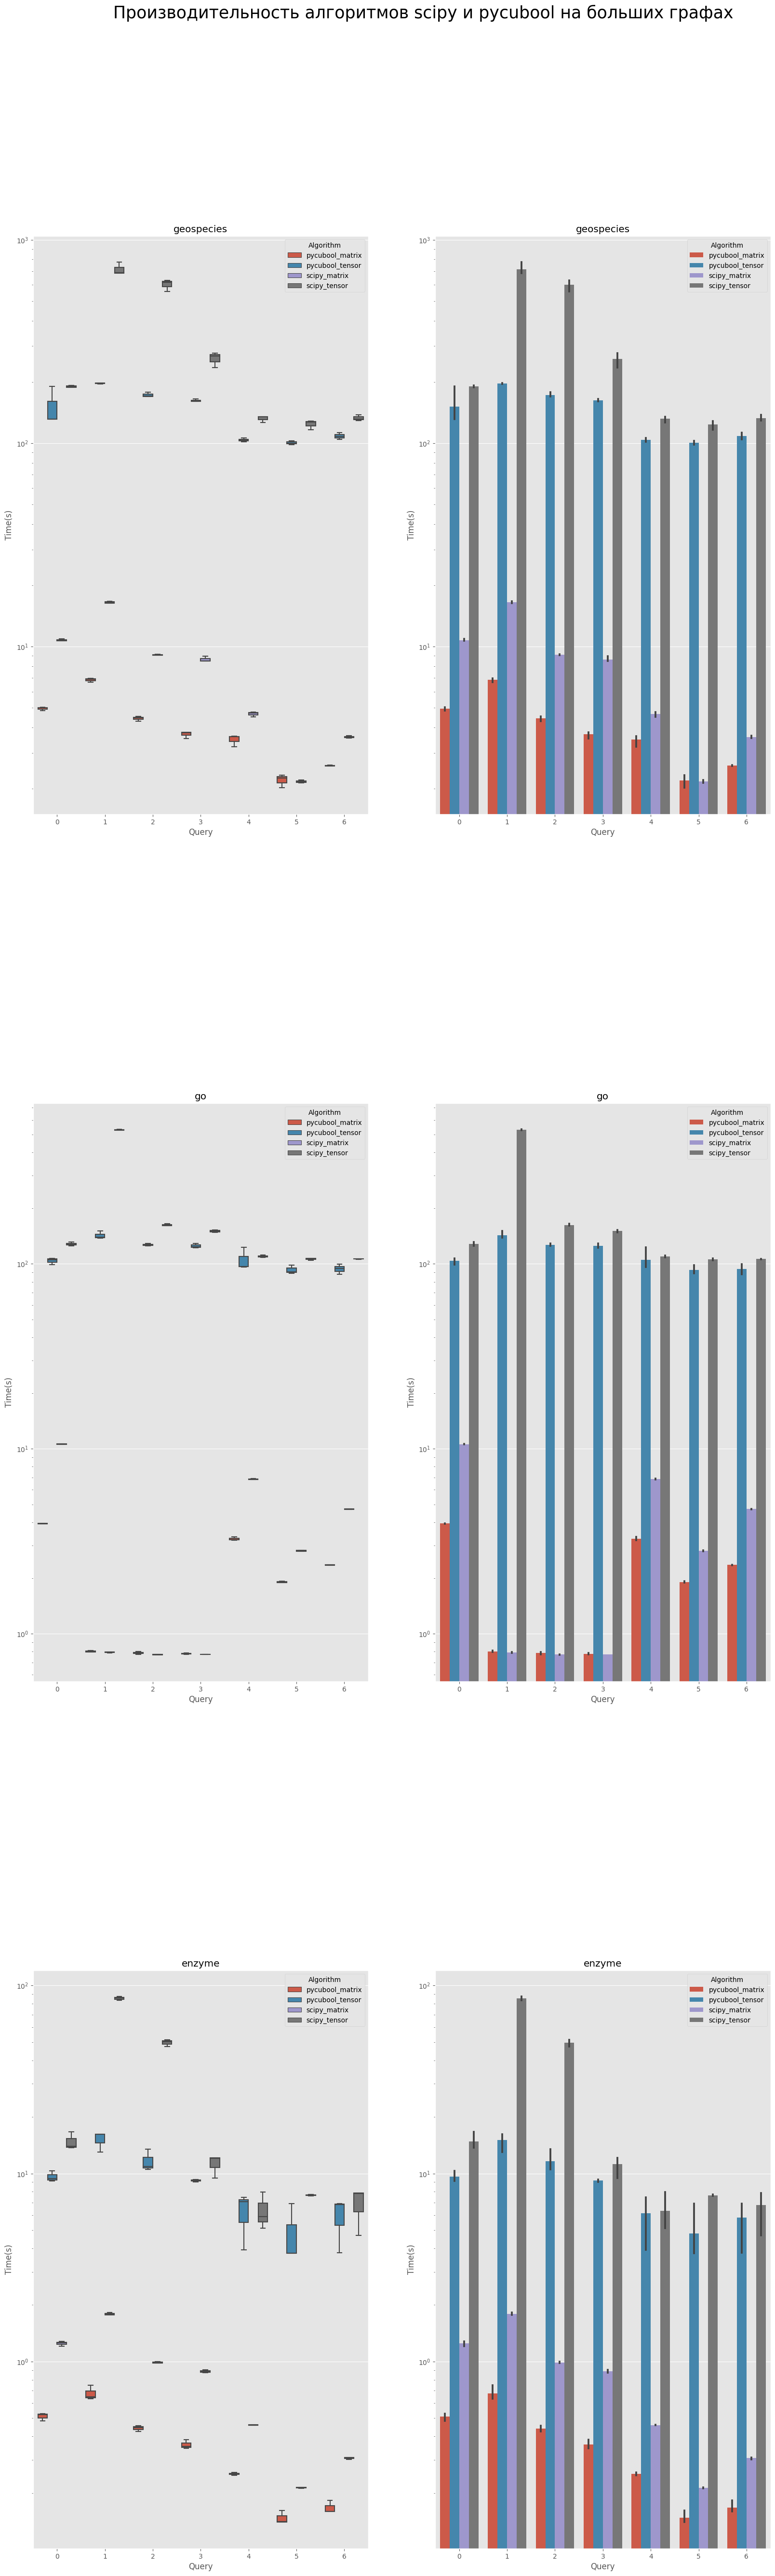

In [30]:
df_big_rdf = create_df(big_graph_names, ['pycubool', 'scipy'], ['matrix', 'tensor'])
show_plots(df_big_rdf, big_graph_names, 'Производительность алгоритмов scipy и pycubool на больших графах')

### Промежуточный результат прогонов на больших графах

Обработка некоторых запросов при использовании тензорных алгоритмов превышало 100 секунд, поэтому далее они рассматриваться не будут.
Далее сделаем 10 одинаковых запусков для сравнения производительностей CPU и GPU реализаций матричного алгоритма

In [23]:
measure_algo_performance(big_graphs, num_runs=10, cfpq_algos=['matrix'], timeout=900, is_gpu=True)
measure_algo_performance(big_graphs, num_runs=10, cfpq_algos=['matrix'], timeout=900, is_gpu=False)

Measuring performance of matrix algorithm with CUDA: True
matrix: run_id = 0, graph = geospecies
matrix: run_id = 1, graph = geospecies
matrix: run_id = 2, graph = geospecies
matrix: run_id = 3, graph = geospecies
matrix: run_id = 4, graph = geospecies
matrix: run_id = 5, graph = geospecies
matrix: run_id = 6, graph = geospecies
matrix: run_id = 7, graph = geospecies
matrix: run_id = 8, graph = geospecies
matrix: run_id = 9, graph = geospecies
matrix: run_id = 0, graph = go
matrix: run_id = 1, graph = go
matrix: run_id = 2, graph = go
matrix: run_id = 3, graph = go
matrix: run_id = 4, graph = go
matrix: run_id = 5, graph = go
matrix: run_id = 6, graph = go
matrix: run_id = 7, graph = go
matrix: run_id = 8, graph = go
matrix: run_id = 9, graph = go
matrix: run_id = 0, graph = enzyme
matrix: run_id = 1, graph = enzyme
matrix: run_id = 2, graph = enzyme
matrix: run_id = 3, graph = enzyme
matrix: run_id = 4, graph = enzyme
matrix: run_id = 5, graph = enzyme
matrix: run_id = 6, graph = enzy

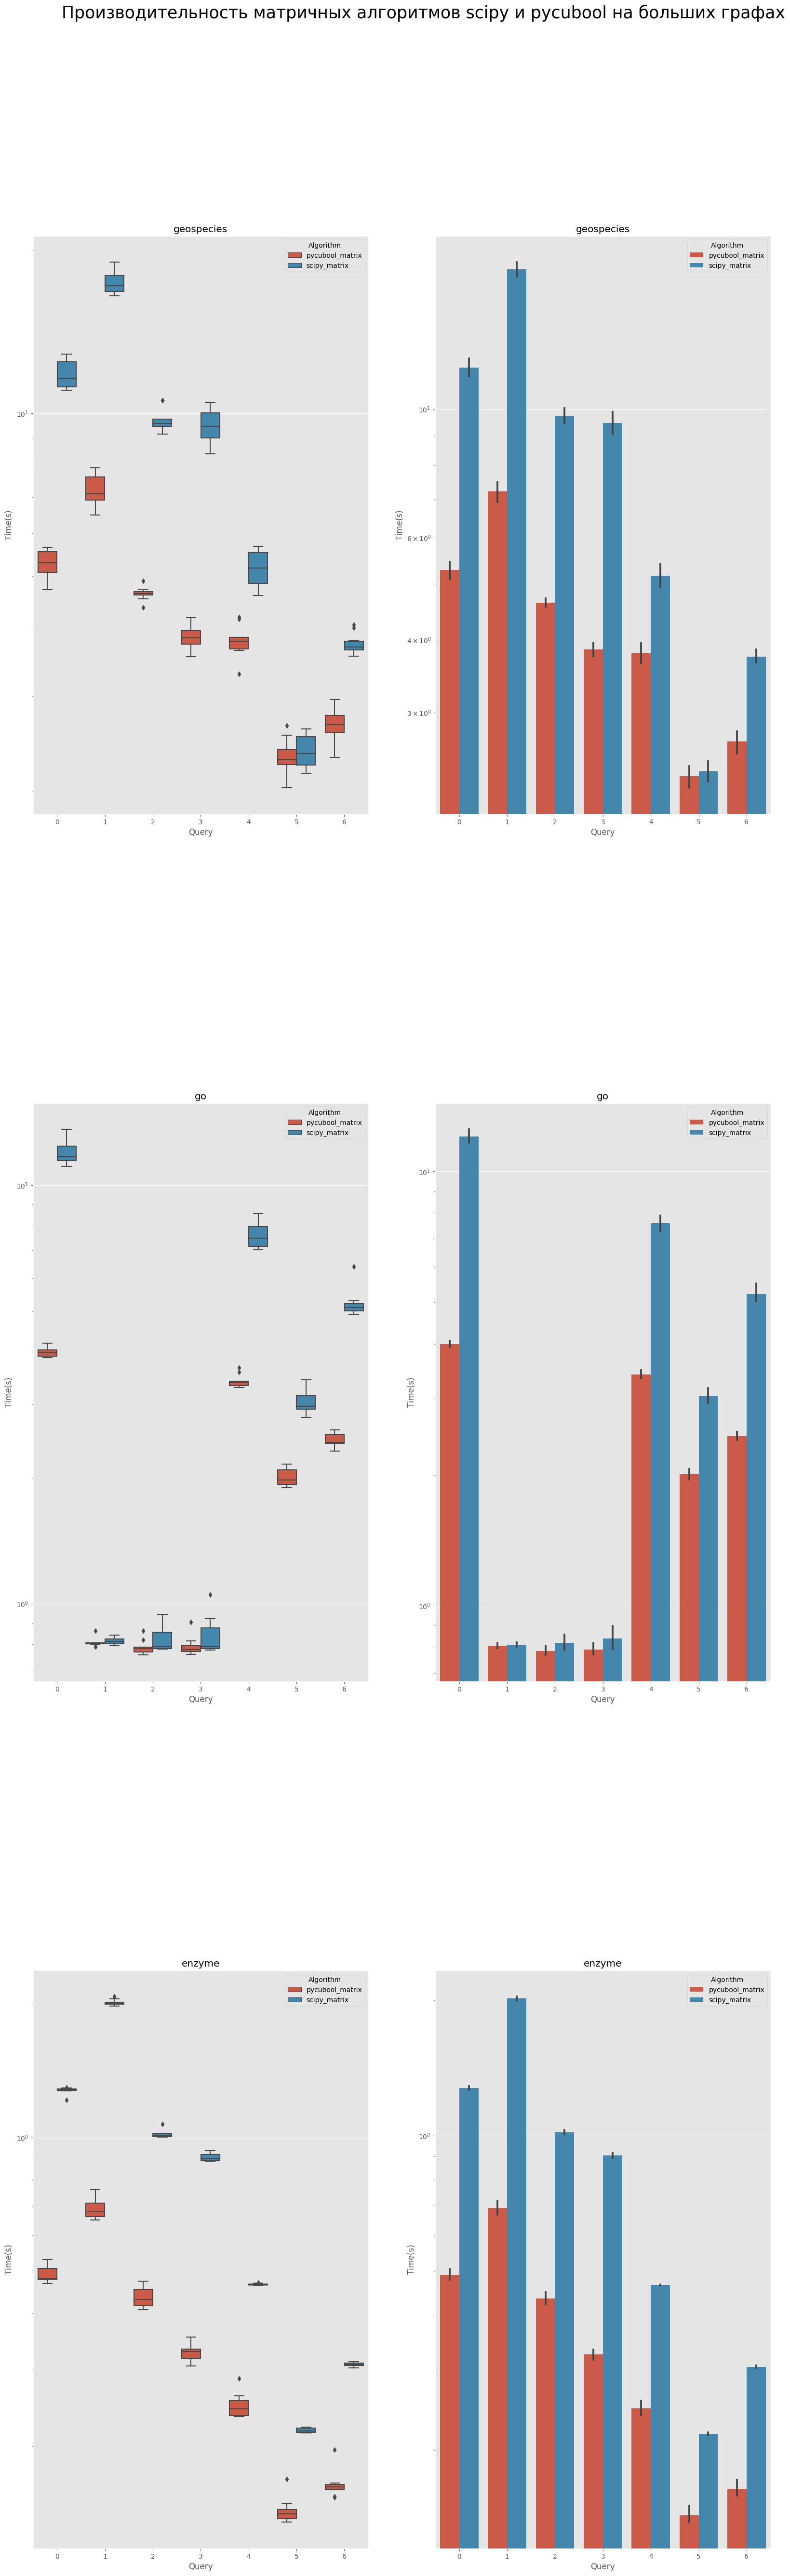

In [24]:
df_big_rdf = create_df(big_graph_names, ['pycubool', 'scipy'], ['matrix'])
show_plots(df_big_rdf, big_graph_names, 'Производительность матричных алгоритмов scipy и pycubool на больших графах')

### Результат прогонов на больших графах
GPU реализация матричного алгоритма оказалась не медленнее CPU реализации на всех рассматриваемых графах и запросах. На некоторых запросах есть выигрыш в несколько раз.

In [36]:
import project.rpq

def measure_rpq_time(graph, queries, num_runs, timeout=0):
    rows = []
    for run_id in range(num_runs):
        print(f"RPQ Tensor: run_id = {run_id}, graph = {graph.name}")
        isFinish = False
        for i, query in enumerate(queries):
            start_time = end_time = None
            if timeout > 0:
                signal.alarm(timeout)
            try:
                start_time = time.time()
                project.rpq.rpq(query, graph.graph)
                end_time = time.time()
                isFinish = True
            except TimeOutException:
                print("TIME OUT!!!")
                end_time = time.time()
                isFinish = False
            rows.append({
                'Time(s)': end_time - start_time,
                'isFinish': isFinish,
                'Query': i
            })
    return rows

In [37]:
def measure_rpq_performance(graphs, num_runs, timeout=0):
    print(f'Measuring performance of tesnor rpq algorithm')
    for graph_name, graph in graphs.items():
        labels = list(graph.labels)
        measurements = measure_rpq_time(
            graph, 
            init_regex_qs(labels),
            num_runs=num_runs,
            timeout=timeout)
        write_measurements(f'benchmark/cfpq_rpq_tensor/{graph_name}.csv', measurements)

In [41]:
!mkdir benchmark/cfpq_rpq_tensor

In [42]:
measure_rpq_performance(small_graphs, 10, timeout=300)

Measuring performance of tesnor rpq algorithm
RPQ Tensor: run_id = 0, graph = pathways
RPQ Tensor: run_id = 1, graph = pathways
RPQ Tensor: run_id = 2, graph = pathways
RPQ Tensor: run_id = 3, graph = pathways
RPQ Tensor: run_id = 4, graph = pathways
RPQ Tensor: run_id = 5, graph = pathways
RPQ Tensor: run_id = 6, graph = pathways
RPQ Tensor: run_id = 7, graph = pathways
RPQ Tensor: run_id = 8, graph = pathways
RPQ Tensor: run_id = 9, graph = pathways
RPQ Tensor: run_id = 0, graph = core
RPQ Tensor: run_id = 1, graph = core
RPQ Tensor: run_id = 2, graph = core
RPQ Tensor: run_id = 3, graph = core
RPQ Tensor: run_id = 4, graph = core
RPQ Tensor: run_id = 5, graph = core
RPQ Tensor: run_id = 6, graph = core
RPQ Tensor: run_id = 7, graph = core
RPQ Tensor: run_id = 8, graph = core
RPQ Tensor: run_id = 9, graph = core
RPQ Tensor: run_id = 0, graph = skos
RPQ Tensor: run_id = 1, graph = skos
RPQ Tensor: run_id = 2, graph = skos
RPQ Tensor: run_id = 3, graph = skos
RPQ Tensor: run_id = 4, gr

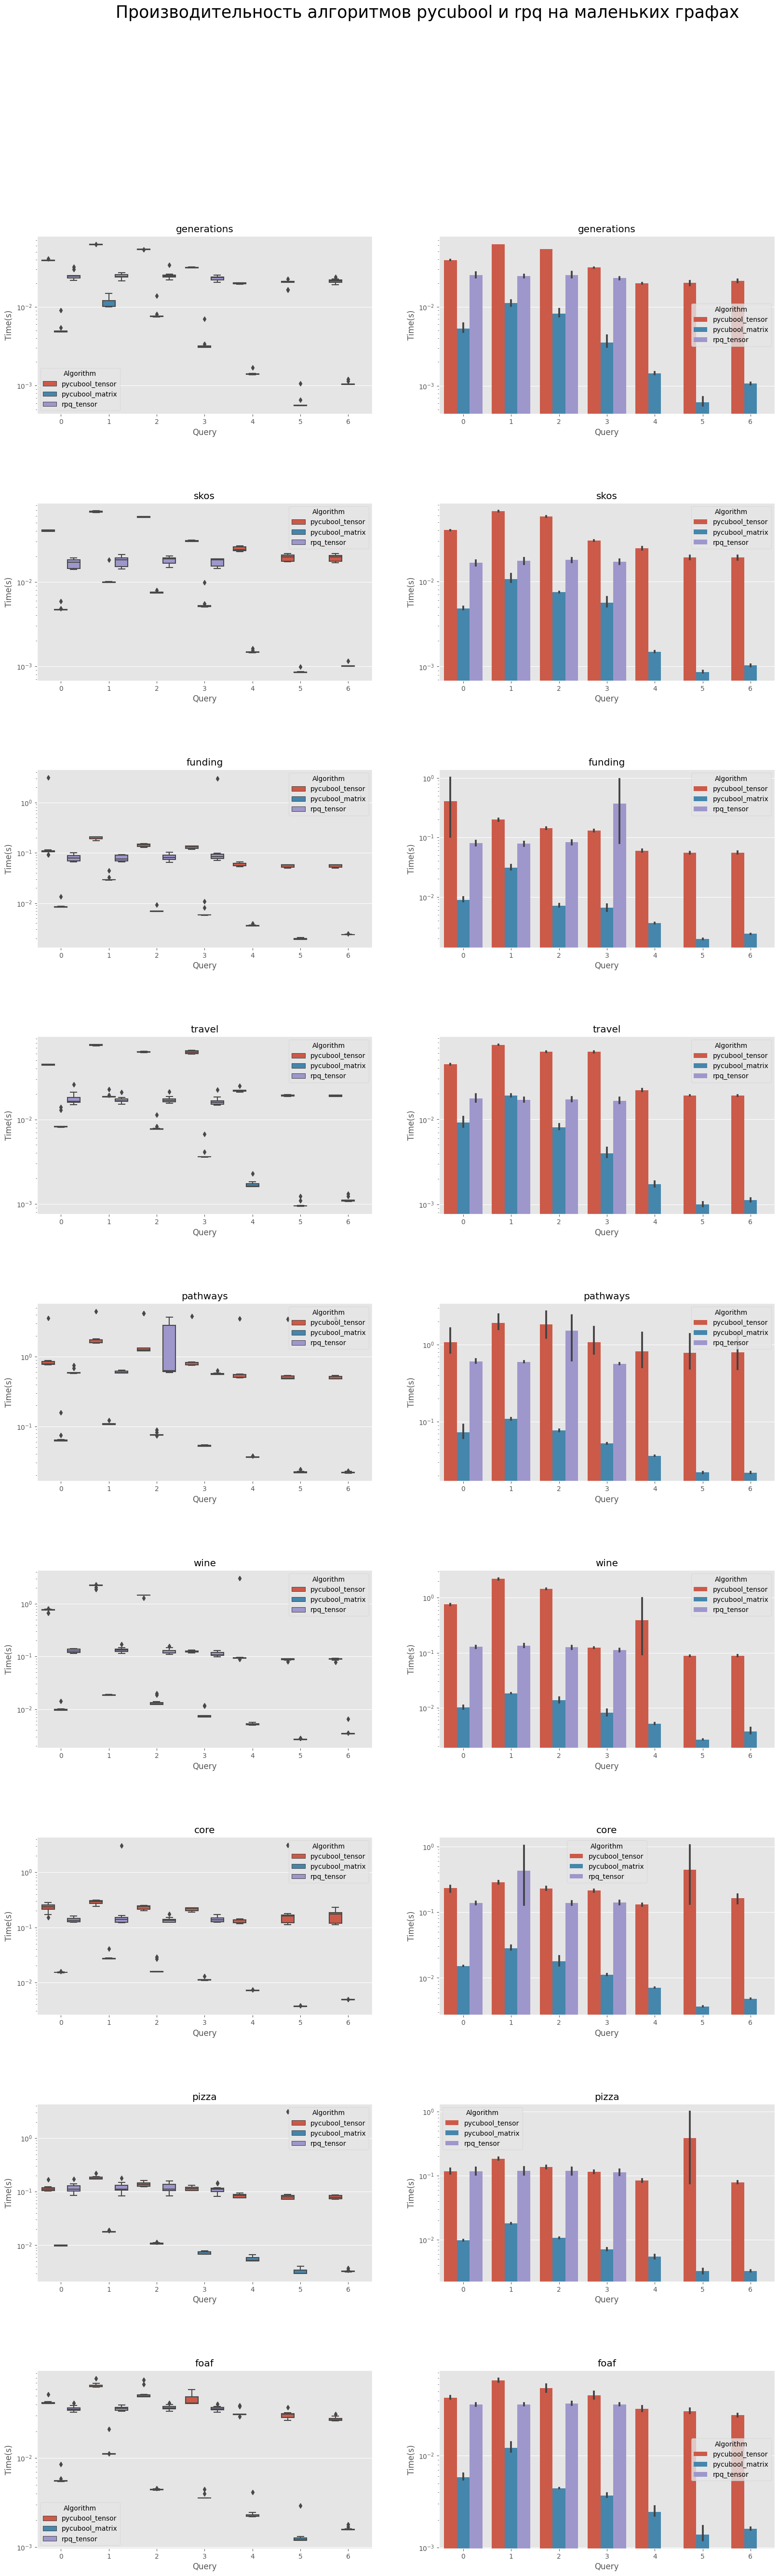

In [20]:
df_small_rpq = create_df(small_graph_names, ['pycubool', 'rpq'], ['tensor', 'matrix'])
show_plots(df_small_rpq, small_graph_names, 'Производительность алгоритмов pycubool и rpq на маленьких графах')

### Анализ производительности специализированных алгоритмов для регулярных ограничений
Матричный алгоритм оказался не хуже специализированного алгоритма с регулярными ограничениями на всех датасетах и всех запросах (за исключением одного запроса к travel-графу). На некоторых запросах выигрыш в производительности был на порядок. <br>
Таким образом, нет необходимости использовать специализированные алгоритмы для регулярных ограничений, можно использовать матричный алгоритм с КС ограничениями и <b>не проигрывать<b> в производительности

### Заключение
В ходе эксперимента было установлено, что самым производительным алгоритмом является матричный алгоритм, реализованный на GPU. Он показал себя лучше при анализе RDF, указателей C и Java-программ. <br> Кроме этого было показано, что при решении задачи достижимости с регулярными ограничениями можно использовать алгоритмы для КС-ограничений и не терять в производительности.